# Exercises F1c: Kinematicizes — Solutions

In [1]:
# Imports…
import math
from math import degrees
import numpy as np
from numpy.linalg import norm
from IPython.display import display, Math
import matplotlib.pyplot as plt

print("Setup complete.")

Setup complete.


## 1. Taylor 1.10

_Uniform circular motion in Cartesian coordinates._

### a) Show that the particle's position is given by…

The _x_ and _y_ components of a point on a circle of radius _R_ are $x = R \cos \theta$ and $y = R \sin \theta$, where $\theta$ is the CCW angle from the $+x$ axis to the point's radius line. (This is just [unit circle](https://en.wikipedia.org/wiki/Unit_circle) stuff, scaled by _R_.)

If the point moves about the circle CCW with constant angular velocity $\omega$, the angle it makes with the $+x$ axis is $\theta = \omega t$. Therefore, the position vector of the point can be written in Cartesian form as

$$ \vec{r} = R \cos\left( \omega t \right) \hat{x} + R \sin\left( \omega t \right) \hat{y} $$

Notice that this can be interpreted as the unit vector $\hat{r} = \cos\left( \omega t \right) \hat{x} + \sin\left( \omega t \right) \hat{y}$ scaled by the radius _R_. (If you're unsure, verify that $\left| \hat{r} \right| = 1$.)

### b) Velocity and acceleration

Straightfowards differentiation with the chain rule:

$$ \vec{v} \equiv \dot{\vec{r}} = -R \omega \sin\left( \omega t \right) \hat{x} + R \omega \cos\left( \omega t \right) \hat{y} $$

$$ \vec{a} \equiv \dot{\vec{v}} = -R \omega^2 \cos\left( \omega t \right) \hat{x} - R \omega^2 \sin\left( \omega t \right) \hat{y} $$

The particle's speed is

$$ \left| \vec{v} \right| = \sqrt{ \left( R \omega \right)^2 \left( \sin^2\left( \omega t \right) + \cos^2\left( \omega t \right) \right) } = R \omega $$

The magnitude of its acceleration is

$$ \left| \vec{a} \right| = \sqrt{ \left( R \omega^2 \right)^2 \left( \cos^2\left( \omega t \right) + \sin^2\left( \omega t \right) \right) } = R \omega^2 $$

The unit vector indicating the direction of its acceleration is

$$ \hat{a} = \frac{\vec{a}}{\left| \vec{a} \right|} = -\cos\left( \omega t \right) \hat{x} - \sin\left( \omega t \right) \hat{y} $$

### c) Relating to "uniform circular motion"

Note that the magnitude of the acceleration can be written as $a = v^2 / R$. The acceleration's direction is the opposite of the position vector, i.e., radially inwards towards the origin.

These are in agreement with the commonly memorized results for uniform circular motion: "An object traveling along a circular path at constant speed $v$ experiences a _centripetal acceleration_ (towards the center of curvature) with a magnitude of $a_\text{c} = v^2 / R$."

---

## 2. Ziggy

_Interrelating kinematic graphs._

First, I'll reproduce the velocity vs. time graph to make sure I've coded it properly:

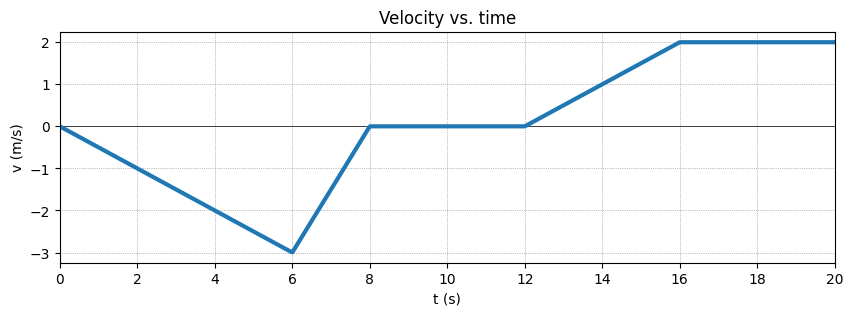

In [30]:
# Making the graph…
a1, a2, a3, a4, a5 = -0.5, 1.5, 0.0, 0.5, 0.0
v_0 = 0.0
def v(t):
    if t <= 0:
        return v_0
    if t <= 6:
        return v_0 + a1 * t
    if t <= 8:
        return v(6) + a2 * (t - 6.0)
    if t <= 12:
        return v(8) + a3 * (t - 8.0)
    if t <= 16:
        return v(12) + a4 * (t - 12.0)
    return v_16
fig, ax = plt.subplots(figsize=(10, 3))
v_values = [v(t) for t in t_values]
ax.plot([0, 20], [0, 0], "k", linewidth=0.5)
ax.plot(t_values, v_values, linewidth=3)
ax.set_xlim(0, 20)
ax.set_xticks(np.arange(0, 21, 2))
ax.set_xlabel('t (s)')
ax.set_ylabel('v (m/s)')
ax.set_title('Velocity vs. time')
ax.grid(True, color='gray', linestyle=':', linewidth=0.5)
pass


### a) Acceleration vs. time graph:

This is just a graph of the instantaneous slope of the velocity graph.

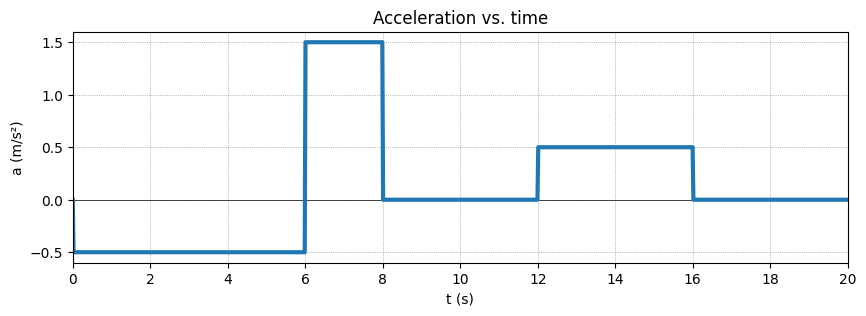

In [31]:
# Making the graph…
def a(t):
    if t <= 0:
        return 0.0
    if t <= 6:
        return a1
    if t <= 8:
        return a2
    if t <= 12:
        return a3
    if t <= 16:
        return a4
    return a5

fig, ax = plt.subplots(figsize=(10, 3))
t_values = np.linspace(0, 20, 1000)
a_values = [a(t) for t in t_values]
ax.plot([0, 20], [0, 0], "k", linewidth=0.5)
ax.plot(t_values, a_values, linewidth=3)
ax.set_xlim(0, 20)
ax.set_xticks(np.arange(0, 21, 2))
ax.set_xlabel('t (s)')
ax.set_ylabel('a (m/s²)')
ax.set_title('Acceleration vs. time')
ax.grid(True, color='gray', linestyle=':', linewidth=0.5)
pass


### b) Position vs. time graph:

This is just a graph of the integrated area under the velocity graph, starting from the initial position of $x = 0$ m.

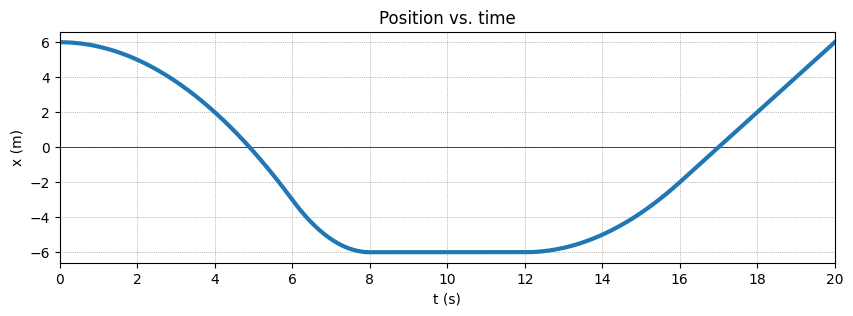

In [34]:
def x(t):
    x_0 = 6.0
    if t <= 0:
        return x_0
    if t <= 6:
        return x(0) + v(0) * t + 0.5 * a1 * t**2
    if t <= 8:
        return x(6) + v(6) * (t - 6.0) + 0.5 * a2 * (t - 6.0)**2
    if t <= 12:
        return x(8) + v(8) * (t - 8.0) + 0.5 * a3 * (t - 8.0)**2
    if t <= 16:
        return x(12) + v(12) * (t - 12.0) + 0.5 * a4 * (t - 12.0)**2
    return x(16) + v_16 * (t - 16.0) + 0.5 * a5 * (t - 16.0)**2

fig, ax = plt.subplots(figsize=(10, 3))
x_values = [x(t) for t in t_values]
ax.plot([0, 20], [0, 0], "k", linewidth=0.5)
ax.plot(t_values, x_values, linewidth=3)
ax.set_xlim(0, 20)
ax.set_xticks(np.arange(0, 21, 2))
ax.set_xlabel('t (s)')
ax.set_ylabel('x (m)')
ax.set_title('Position vs. time')
ax.grid(True, color='gray', linestyle=':', linewidth=0.5)
pass

### c) Speeding up when?

The object is speeding up whenever the magnitude of its velocity is getting larger, which means whenever the velocity vs. time graph is getting farther from the time axis as time increases. Looking at the graph given in the problem, I see that the object is speeding up for 0 < _t_ < 6 s and 12 s < _t_ < 16 s.

### d) Location at $t = 18$ s?

The object's position at t = 18 s is its initial position plus its displacement over the 18 second interval. The displacement is the area "under" the velocity vs. time graph (where area below the t-axis counts as negative). The initial triangle from t = 0 to t = 8 s has an area of 1/2 (8s)(-3 m/s) = -12 ms. The triangle from t = 12 s to t = 16 s has an area of 1/2 (4s)(2 m/s) = 4 m. The final rectangular segment from t = 16 s to t = 18 s has an area of (2 s)(2 m/s) = 4 m. Therefore, the object's total displacement is -4 m, and its final position is x = 2 m.

This agrees with the value of the position vs. time graph at t = 18 s.

---

## 3. Cycloid


A _cycloid_ is the path traced out by a point on the rim of a hoop of radius $A$ that rolls without slipping.

Just to aid intuition, here's a plot of the cycloid trajectory $y(x)$.

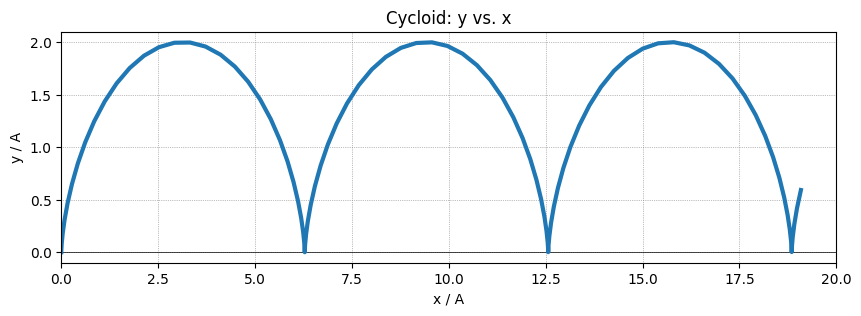

In [40]:
# Make the plot parametrically, using dimensionless (scaled) coordinates
# (equivalent to A = 1 m and b = 1 (1/s).)
def cycloid(t):
    return t - np.sin(t), 1 - np.cos(t)

fig, ax = plt.subplots(figsize=(10, 3))
t_max = 20
t_values = np.linspace(0, t_max, 100)
x_values, y_values = cycloid(t_values)
ax.plot([0, t_max], [0, 0], "k", linewidth=0.5)
ax.plot(x_values, y_values, linewidth=3)
ax.set_xlim(0, t_max)
# ax.set_xticks(np.arange(0, 21, 2))
ax.set_xlabel('x / A')
ax.set_ylabel('y / A')
ax.set_title('Cycloid: y vs. x')
ax.grid(True, color='gray', linestyle=':', linewidth=0.5)
pass

### a) Velocity

Straightforwards differentiation:

$$\begin{split}
&\vec{v} \equiv \dot{\vec{r}} = \frac{d}{dt} \left\{ A \left[ b\,t - \sin(b\,t) \right] \hat{\imath} + A \left[ 1 - \cos(b\,t) \right] \hat{\jmath} \right\} \\ \quad \\
&\Rightarrow \boxed{ \vec{v} = A b \left[ 1 - \cos(b\,t) \right] \hat{\imath} + A b \sin(b\,t) \hat{\jmath}}
\end{split}$$

### b) Speed

$$\begin{split}
&v \equiv \left| \vec{v} \right| = \sqrt{ v_x^2 + v_y^2 } = \sqrt{ \left( A b \right)^2 \left[ 1 - \cos(b\,t)\right]^2 + \left[ \sin(b\,t) \right]^2 } \\ \quad \\
& \qquad = Ab \sqrt{ 1 - 2 \cos(b\,t) + \cos^2(b\,t) + \sin^2(b\,t) } \\ \quad \\ 
&\Rightarrow \boxed{ v = Ab \sqrt{ 2 \left[1 - \cos(b\,t)\right] } } 
\end{split}$$

Notice that the speed is always positive, and oscillates between 0 and $2Ab$.

### c) Acceleration

More straightforwards differentiation:

$$\begin{split}
&\vec{a} \equiv \dot{\vec{v}} = \frac{d}{dt} \left\{ A b \left[ 1 - \cos(b\,t) \right] \hat{\imath} + A b \sin(b\,t) \hat{\jmath} \right\} \\ \quad \\
&\Rightarrow \boxed{ \vec{a} = A b^2 \sin(b\,t) \hat{\imath} + A b^2 \cos(b\,t) \hat{\jmath} }
\end{split}$$

### d) Magnitude of acceleration

$$\begin{split}
&a \equiv \left| \vec{a} \right| = \sqrt{ a_x^2 + a_y^2 } = Ab^2 \sqrt{ \sin^2(b\,t) + \cos^2(b\,t) } \\ \quad \\ 
&\Rightarrow \boxed{ a = Ab^2 }
\end{split}$$

Notice that the acceleration is constant. In the frame of reference, a point on the rim would experience uniform circular motion, which has a constant centripetal acceleration. Galilean reference frame changes (i.e., from the wheel center's frame to the tabletop frame) don't affect acceleration.

---